Inputs (X):
[[   6. -697. -618.  533. -681.]
 [   7. -702. -579.  549. -677.]
 [   8. -703. -487.  575. -677.]
 [   9. -705. -449.  561. -679.]
 [  10. -705. -431.  563. -680.]]

Outputs (Y):
[[-721.  174.  192.]
 [-699.  171.  193.]
 [-694.  169.  224.]
 [-678.  155.  211.]
 [-692.  137.  175.]]
\   β :  
[[-1.02682091e+03  5.22629089e+02  4.97540202e+02]
 [-6.17445319e-01  8.68910331e-01  8.60595751e-01]
 [ 9.89633270e-02  1.32990394e+00  1.42716613e-01]
 [ 5.42795462e-02 -1.11832704e+00  2.44338280e-02]
 [ 5.18651654e-01 -6.07912437e-02 -5.20910500e-01]
 [-1.92173800e-01 -2.80922628e-03 -8.40667303e-02]]

MSE : [45387.1457463624, 32832.53112010468, 7345.344741696585]
R² : [0.5571461198012955, 0.8585637139384952, 0.7513092851544368]


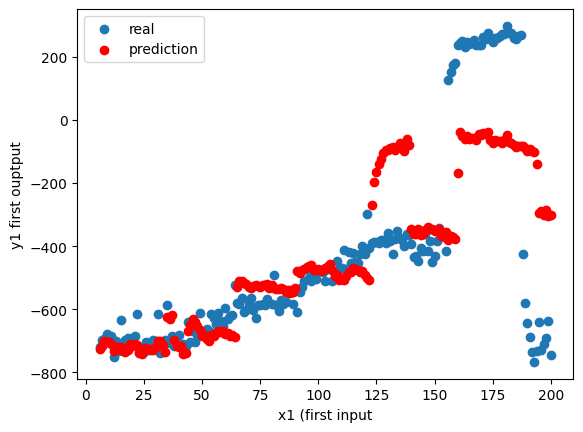

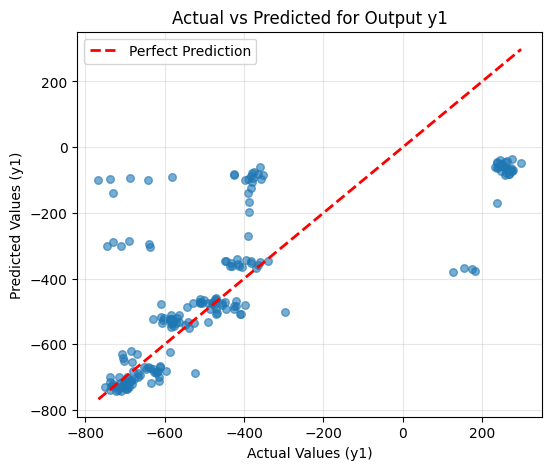

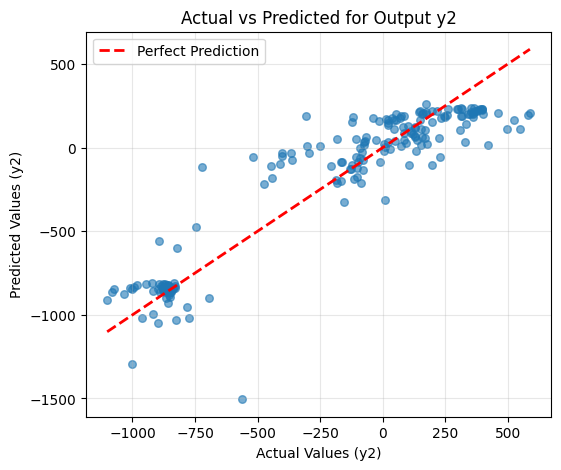

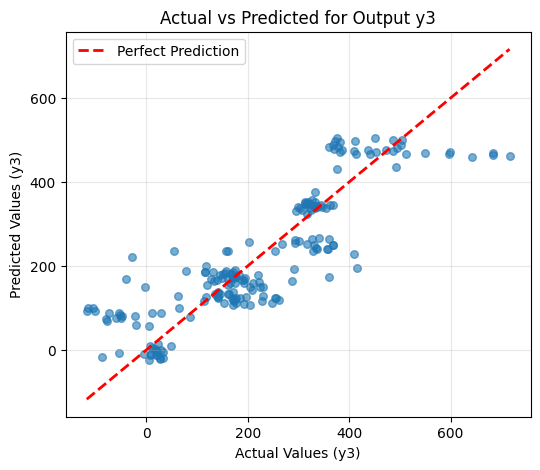

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
file_path = r"C:\Users\Adak\Desktop\AI\jupyter\powerplant.dat"
# Skip the first few lines that contain metadata
df = pd.read_csv(file_path, sep='\s+', skiprows=5, header=None)
x = df.iloc[:, :5].values  
y = df.iloc[:, 5:8].values
print("Inputs (X):")
print(x[:5])
print("\nOutputs (Y):")
print(y[:5])
x_with_bias = np.column_stack([np.ones(x.shape[0]), x]) 
beta = np.linalg.inv(x_with_bias.T @ x_with_bias) @ (x_with_bias.T @ y)
y_pred = x_with_bias @ beta

mse_each_output = [mean_squared_error(y[:, j], y_pred[:, j]) for j in range(y.shape[1])]
r2_each_output = [r2_score(y[:, j], y_pred[:, j]) for j in range(y.shape[1])]


print("\   β :  ")
print(beta)

print("\nMSE :", mse_each_output)
print("R² :", r2_each_output)


plt.scatter(x[:, 0], y[:, 0], label="real")            
plt.scatter(x[:, 0], y_pred[:, 0], color="red", label="prediction")  
plt.xlabel("x1 first input")
plt.ylabel("y1 first ouptput")
plt.legend()
plt.show()





for j in range(y.shape[1]):
    plt.figure(figsize=(6, 5))
    plt.scatter(y[:, j], y_pred[:, j], alpha=0.6, s=30)
    plt.plot([y[:, j].min(), y[:, j].max()],
             [y[:, j].min(), y[:, j].max()],
             'r--', lw=2, label='Perfect Prediction')
    plt.xlabel('Actual Values (y{})'.format(j+1))
    plt.ylabel('Predicted Values (y{})'.format(j+1))
    plt.title('Actual vs Predicted for Output y{}'.format(j+1))
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()